## Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 

## Preprocessing data

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(450000, 20)

In [4]:
df.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [5]:
df.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
pickup_time               2421
delivered_time            5218
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
dtype: int64

Dropping the 4 columns with maximum missing values 

In [6]:
df.drop(columns=['reassignment_method','reassignment_reason','reassigned_order','cancelled_time'],axis=1,inplace=True)

In [7]:
df.drop(columns=['order_time','allot_time','accept_time','pickup_time','delivered_time'],axis=1,inplace=True)

In [8]:
df.shape 

(450000, 11)

In [9]:
df['delivered_orders'].isnull().sum()

17341

In [10]:
df['undelivered_orders'].isnull().sum()

17341

Delivered,undelivered orders contain null values to be dropped

In [11]:
df.isnull().sum()

order_id                    0
order_date                  0
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders          16948
delivered_orders        17341
cancelled                   0
undelivered_orders      17341
lifetime_order_count       53
session_time             3675
dtype: int64

In [12]:
df_new=df.dropna(axis=0) # dropping null values in all the rows

In [13]:
df_new.isnull().sum()

order_id                0
order_date              0
rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
cancelled               0
undelivered_orders      0
lifetime_order_count    0
session_time            0
dtype: int64

No more missing values in dataframe

In [14]:
df_new.shape

(429315, 11)

In [15]:
df_new.head()

,order_id,order_date,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time
1,556754,2021-01-26 00:00:00,18117,2.520700,2.76,8.0,8.0,0,0.0,105.0,3.266667
2,556755,2021-01-26 00:00:00,18623,2.207400,4.80,1.0,1.0,0,0.0,66.0,9.816667
3,556756,2021-01-26 00:00:00,15945,2.189400,6.38,1.0,1.0,0,0.0,127.0,17.533333
4,556757,2021-01-26 00:00:00,17589,2.787000,4.01,34.0,34.0,0,0.0,84.0,1.350000
7,556760,2021-01-26 00:00:00,8493,0.025681,0.16,54.0,53.0,0,1.0,270.0,44.166667


<AxesSubplot:>

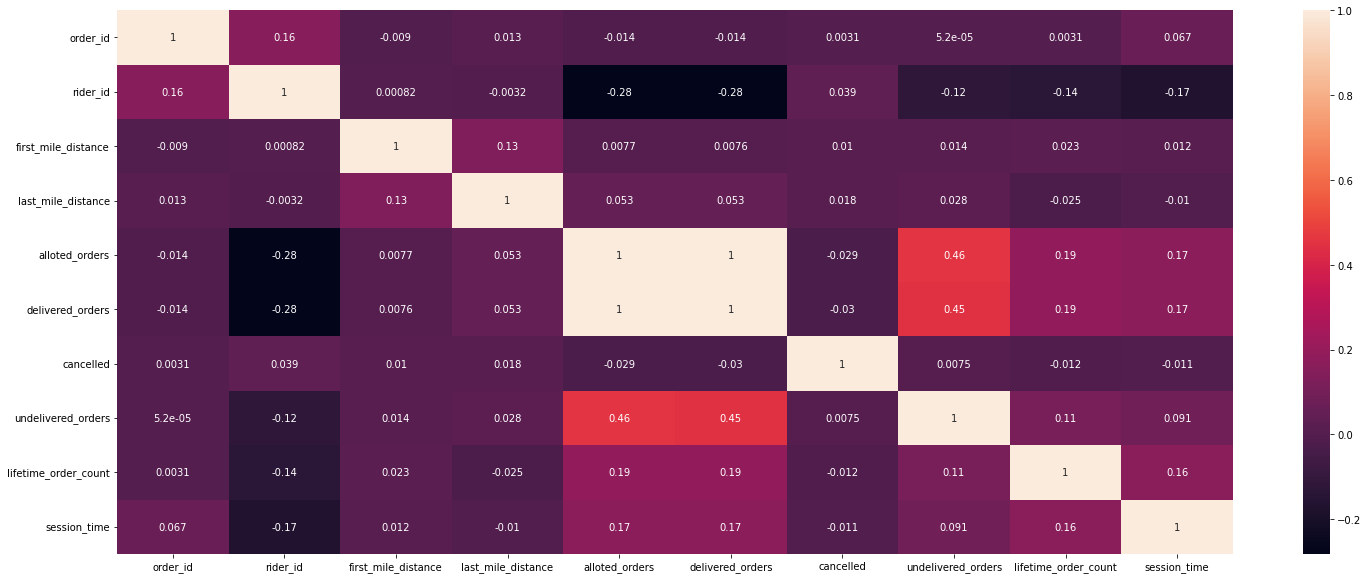

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df_new.corr(),annot=True)

## Machine Learning

In [283]:
from sklearn.model_selection import GridSearchCV


In [458]:
X=df_new.drop(columns=['order_date','cancelled'],axis=1)
y=df_new['cancelled']

In [352]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)

In [354]:
k=clf.predict(X)

In [355]:
from sklearn.metrics import accuracy_score
accuracy_score(k,y)*100

99.01401069145034

In [344]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
    

In [346]:
pipe = Pipeline(steps=[ ('dec_tree',clf)])

In [348]:
n_components = list(range(1,X.shape[1]+1,1))

In [349]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(dec_tree__criterion=criterion,dec_tree__max_depth=max_depth)   
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y) 

GridSearchCV(estimator=Pipeline(steps=[('dec_tree',
                                        DecisionTreeClassifier(max_depth=7))]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]})

In [351]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print(); 
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 2

DecisionTreeClassifier(max_depth=2)


In [380]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [383]:
X, y = make_classification(n_samples=1000, n_features=9,
                          n_informative=2, n_redundant=0,
                     random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [295]:
#from sklearn import svm
#clf = svm.SVC()
#clf.fit(X, y)

SVC()

In [490]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X, y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [459]:
from xgboost import XGBClassifier

In [462]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X, y)

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:56:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## XGboost

In [17]:
X=df_new.drop(columns=['order_date','cancelled'],axis=1)
y=df_new['cancelled']

In [19]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [20]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [21]:
classifier=xgboost.XGBClassifier()

In [22]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [24]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgbo

[15:23:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.588 total time= 2.9min
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.558 total time= 2.9min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.541 total time= 2.9min
[15:25:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.579 total time= 2.8min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.563 total time= 4.8min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.587 total time= 4.8min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.556 total time= 4.9min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.598 total time= 1.5min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.568 total time= 1.5min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:32:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.525 total time= 5.0min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.528 total time= 1.6min
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.536 total time= 1.5min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.622 total time= 1.2min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.619 total time= 1.3min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.543 total time= 1.4min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=3;, score=0.572 total time= 4.7min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.636 total time=  51.1s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.609 total time= 1.3min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.611 total time= 1.3min
[15:36:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3;, score=0.614 total time= 1.3min


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.669 total time=  47.5s
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.649 total time=  48.3s
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.642 total time=  47.5s
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3;, score=0.620 total time=  45.5s


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [25]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [50]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
X

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
1,556754,18117,2.520700,2.76,8.0,8.0,0.0,105.0,3.266667
2,556755,18623,2.207400,4.80,1.0,1.0,0.0,66.0,9.816667
3,556756,15945,2.189400,6.38,1.0,1.0,0.0,127.0,17.533333
4,556757,17589,2.787000,4.01,34.0,34.0,0.0,84.0,1.350000
7,556760,8493,0.025681,0.16,54.0,53.0,1.0,270.0,44.166667
...,...,...,...,...,...,...,...,...,...
449995,130226,1006,0.578900,0.19,4.0,4.0,0.0,127.0,369.516667
449996,130227,279,1.986300,1.19,81.0,81.0,0.0,105.0,239.133333
449997,130228,3161,1.594400,1.61,28.0,28.0,0.0,1488.0,204.150000
449998,130229,9396,2.893900,4.68,72.0,72.0,0.0,105.0,65.583333


In [52]:
classifier.fit(X,y)

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [65]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y)

/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:51:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/abhaylal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:51:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
score

array([0.99011216, 0.99007722, 0.99008886, 0.99008886, 0.99013545])

## Decission tree classifier

In [67]:
X=df_new.drop(columns=['order_date','cancelled'],axis=1)
y=df_new['cancelled']

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
from sklearn import metrics

In [72]:
dtc = DecisionTreeClassifier(min_samples_split=50, random_state=0)

# 2. Fit
dtc.fit(X,y)

# 3. Predict, there're 4 features in the iris dataset
y_pred_class = dtc.predict(X)

# Accuracy
metrics.accuracy_score(y, y_pred_class)

0.9920338213200098

In [133]:
from sklearn.model_selection import GridSearchCV


# Define the parameter values that should be searched
sample_split_range = list(range(49, 60))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split=sample_split_range)

# instantiate the grid
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='roc_auc')

# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_split=50,
                                              random_state=0),
             param_grid={'min_samples_split': [49, 50, 51, 52, 53, 54, 55, 56,
                                               57, 58, 59]},
             scoring='roc_auc')

In [135]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.5415216233781113
{'min_samples_split': 55}
DecisionTreeClassifier(min_samples_split=55, random_state=0)


In [136]:
dtc_new=DecisionTreeClassifier(min_samples_split=55, random_state=0)

In [137]:
dtc_new.fit(X,y)

DecisionTreeClassifier(min_samples_split=55, random_state=0)

## Test

In [138]:
X

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
1,556754,18117,2.520700,2.76,8.0,8.0,0.0,105.0,3.266667
2,556755,18623,2.207400,4.80,1.0,1.0,0.0,66.0,9.816667
3,556756,15945,2.189400,6.38,1.0,1.0,0.0,127.0,17.533333
4,556757,17589,2.787000,4.01,34.0,34.0,0.0,84.0,1.350000
7,556760,8493,0.025681,0.16,54.0,53.0,1.0,270.0,44.166667
...,...,...,...,...,...,...,...,...,...
449995,130226,1006,0.578900,0.19,4.0,4.0,0.0,127.0,369.516667
449996,130227,279,1.986300,1.19,81.0,81.0,0.0,105.0,239.133333
449997,130228,3161,1.594400,1.61,28.0,28.0,0.0,1488.0,204.150000
449998,130229,9396,2.893900,4.68,72.0,72.0,0.0,105.0,65.583333


In [139]:
test=pd.read_csv('test.csv')

In [140]:
test

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.658500,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.070900,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.388400,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.903900,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.827500,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144839,2021-02-09 20:13:39,41184,2021-02-09 00:00:00,2021-02-09 20:13:40,2021-02-09 20:13:49,7141,1.417000,3.96,52.0,52.0,0.0,413.0,NaN,NaN,NaN,179.266667
144840,2021-02-09 20:21:36,41185,2021-02-09 00:00:00,2021-02-09 20:21:59,2021-02-09 20:22:33,8113,0.775600,1.61,95.0,93.0,2.0,284.0,NaN,NaN,NaN,244.400000
144841,2021-02-09 20:24:25,41186,2021-02-09 00:00:00,2021-02-09 20:25:03,2021-02-09 20:26:10,5040,2.049400,1.26,77.0,77.0,0.0,119.0,NaN,NaN,NaN,259.000000
144842,2021-02-09 20:28:07,41187,2021-02-09 00:00:00,2021-02-09 20:28:29,2021-02-09 20:28:53,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,NaN,NaN,NaN,814.283333


In [141]:
test.drop(columns=['reassignment_method','reassignment_reason','reassigned_order'],axis=1,inplace=True)
test.drop(columns=['order_time','allot_time','accept_time'],axis=1,inplace=True)

In [142]:
X_test=test.drop(columns=['order_date'],axis=1)

In [143]:
X_test

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
0,130231,12884,1.658500,4.54,216.0,215.0,1.0,747.0,273.400000
1,130232,3541,2.070900,5.84,52.0,52.0,0.0,75.0,252.100000
2,130233,603,1.388400,0.99,289.0,289.0,0.0,2214.0,241.383333
3,130234,3414,1.903900,2.59,125.0,122.0,3.0,1020.0,291.933333
4,130235,1426,0.827500,0.94,352.0,350.0,2.0,7284.0,247.133333
...,...,...,...,...,...,...,...,...,...
144839,41184,7141,1.417000,3.96,52.0,52.0,0.0,413.0,179.266667
144840,41185,8113,0.775600,1.61,95.0,93.0,2.0,284.0,244.400000
144841,41186,5040,2.049400,1.26,77.0,77.0,0.0,119.0,259.000000
144842,41187,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,814.283333


In [144]:
X_test.tail()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
144839,41184,7141,1.417000,3.96,52.0,52.0,0.0,413.0,179.266667
144840,41185,8113,0.775600,1.61,95.0,93.0,2.0,284.0,244.400000
144841,41186,5040,2.049400,1.26,77.0,77.0,0.0,119.0,259.000000
144842,41187,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,814.283333
144843,41188,8488,1.702100,4.13,28.0,28.0,0.0,43.0,161.533333


In [145]:
X_test.isnull().sum()

order_id                   0
rider_id                   0
first_mile_distance        0
last_mile_distance         0
alloted_orders          4773
delivered_orders        4884
undelivered_orders      4884
lifetime_order_count     778
session_time            5054
dtype: int64

In [146]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_test[['alloted_orders','delivered_orders','undelivered_orders','lifetime_order_count','session_time']])

In [147]:
X_test[['alloted_orders','delivered_orders','undelivered_orders','lifetime_order_count','session_time']]=imp.transform(X_test[['alloted_orders','delivered_orders','undelivered_orders','lifetime_order_count','session_time']])

In [148]:
X_test

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time
0,130231,12884,1.658500,4.54,216.0,215.0,1.0,747.0,273.400000
1,130232,3541,2.070900,5.84,52.0,52.0,0.0,75.0,252.100000
2,130233,603,1.388400,0.99,289.0,289.0,0.0,2214.0,241.383333
3,130234,3414,1.903900,2.59,125.0,122.0,3.0,1020.0,291.933333
4,130235,1426,0.827500,0.94,352.0,350.0,2.0,7284.0,247.133333
...,...,...,...,...,...,...,...,...,...
144839,41184,7141,1.417000,3.96,52.0,52.0,0.0,413.0,179.266667
144840,41185,8113,0.775600,1.61,95.0,93.0,2.0,284.0,244.400000
144841,41186,5040,2.049400,1.26,77.0,77.0,0.0,119.0,259.000000
144842,41187,2946,0.080494,5.50,231.0,228.0,3.0,1759.0,814.283333


In [149]:
X_test.isnull().sum()

order_id                0
rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
undelivered_orders      0
lifetime_order_count    0
session_time            0
dtype: int64

In [150]:
dtc_new.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
y_test=dtc_new.predict(X_test)

In [152]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [153]:
dtc_new.score(X_test,y_test)

1.0

In [154]:
X_test['order_id'].shape

(144844,)

In [155]:
y_test.shape

(144844,)

In [156]:
final=pd.DataFrame()

In [157]:
final['order_id']=X_test['order_id']

In [158]:
final['cancelled']=y_test

In [159]:
final

,order_id,cancelled
0,130231,0
1,130232,0
2,130233,0
3,130234,0
4,130235,0
...,...,...
144839,41184,0
144840,41185,0
144841,41186,0
144842,41187,0


In [160]:
final

,order_id,cancelled
0,130231,0
1,130232,0
2,130233,0
3,130234,0
4,130235,0
...,...,...
144839,41184,0
144840,41185,0
144841,41186,0
144842,41187,0


In [161]:
final.to_csv('submit_1.csv', index=False)

In [162]:
X_test.isnull().sum()

order_id                0
rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
undelivered_orders      0
lifetime_order_count    0
session_time            0
dtype: int64